<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Jessica Nailea Ambriz Gaona, Daphne .... 

**Fecha:** 05 de marzo del 2020.

**Expediente** : 717945 y ...
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 9 y 10 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.special as sps
import random
import scipy.optimize as opt
from scipy.stats import beta

%matplotlib inline

### Parte 1 Clase 9:

1. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:

>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(1+k)k!}$$
$$P(k + 1)=\frac{\lambda}{(1+k)} P(k,\lambda) $$

In [6]:
def Poisson(lamda,k):
    return (np.exp(-lamda)*lamda* k)/sps.gamma(k)
lamda = 15
k=np.arange(0,20)
datos = Poisson(lamda,k)

### Parte 2 Clase 10:

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:

2. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

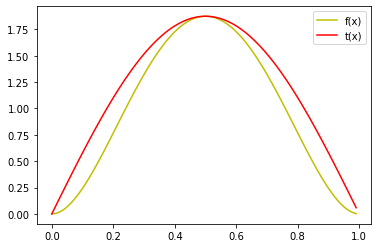

In [12]:
f = lambda x: 30*((x**2)-(2*x**3)+(x**4))
a = f(opt.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)',c='y', ms=10)
plt.plot(x,t(x),label='t(x)', c='r', ms=10)
plt.legend(loc="best")
plt.show()

3. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).


$$g(x)=\frac{t(x)}{c}$$  donde despejando c obtenemos integrando 
$$c=\int_{-\infty}^{\infty}t(x)dx$$

y cambiamos los limites $$\int_{a}^{b}t(x)dx$$
donde decimos que
$a=0$ y $b=1$ 
porque son los límites en función de la gráfica
$$\int_{0}^{1}t(x)d(x) = \int_{0}^{1}a\sin(\pi x)= \frac{-a\cos(\pi x)}{\pi}|_{0}^{1} = -\frac{a\cos(\pi)}{\pi}+ \frac{a\cos(0)}{\pi} = \frac{a}{\pi}+\frac{a}{\pi}=\frac{2a}{\pi}$$
Por lo tanto
$$g(x)=\frac{\pi\sin(\pi x)}{2}$$


4. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex).

Integramos y sacamos la inversa 
$$g(x)=\sin(\pi x)$$

$$\int_{0}^{x} sin(\pi y) \ dy = -\displaystyle\frac{1}{\pi} cos(\pi y)  |_0^x = -\frac{1}{\pi} cos(\pi x) + \frac{1}{\pi} = U$$

$$cos(\pi x) = -\pi (U- \frac{1}{\pi})$$

$$cos(\pi x) = 1 - \pi U$$

$$x = \frac{1}{\pi} \arccos{(1- \pi U)} $$


5. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
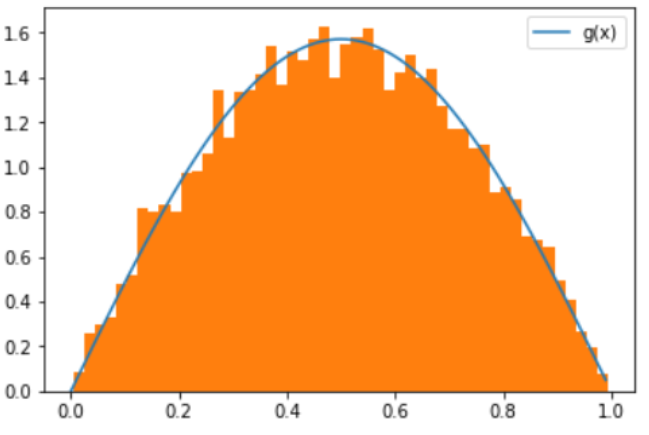

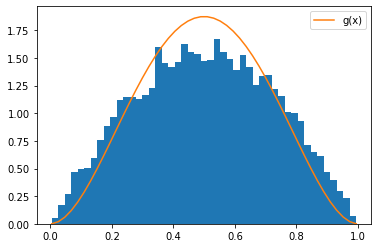

In [36]:
g = lambda x: np.pi*np.sin(np.pi*x)/2
r2=lambda x: np.arccos(1-2*U)/np.pi
N = 10000
U = np.random.rand(N)
xx=r2(U)
y,xn,ig = plt.hist(xx, bins=47, density = True)
plt.plot(xn,f(xn),label='g(x)')
plt.legend()
plt.show()

6. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

7. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

8. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo